<div style="border-radius: 0 30px 0 20px; background-color:#751C09; padding:2px; margin-bottom: 10px;">
    <blockquote style="border-left: 5px solid #751C09; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 35px; text-align: center; font-family: Montserrat; font-weight: semibold; letter-spacing: 2px; color:#ffffff">🏡 House Price Prediction</p>  
    </blockquote>
</div>

**Features**

The dataset has 80 features as listed below:

*   SalePrice - the property's sale price in dollars.
*   MSSubClass: The building class
*   MSZoning: The general zoning classification
*  LotFrontage: Linear feet of street connected to property
*   LotArea: Lot size in square feet
*   Street: Type of road access
*   Alley: Type of alley access
*   LotShape: General shape of property
*   LandContour: Flatness of the property
*   Utilities: Type of utilities available
*   LotConfig: Lot configuration
*   LandSlope: Slope of property
*   Neighborhood: Physical locations within Ames city limits
*   Condition1: Proximity to main road or railroad
*   Condition2: Proximity to main road or railroad (if a second is present)
*   BldgType: Type of dwelling
*   HouseStyle: Style of dwelling
*   OverallQual: Overall material and finish quality
*   OverallCond: Overall condition rating
*   YearBuilt: Original construction date
*   YearRemodAdd: Remodel date
*   RoofStyle: Type of roof
*   RoofMatl: Roof material
*   Exterior1st: Exterior covering on house
*   Exterior2nd: Exterior covering on house (if more than one material)
*   MasVnrType: Masonry veneer type
*   MasVnrArea: Masonry veneer area in square feet
*   ExterQual: Exterior material quality
*   ExterCond: Present condition of the material on the exterior
*   Foundation: Type of foundation
*   BsmtQual: Height of the basement
*   BsmtCond: General condition of the basement
*   BsmtExposure: Walkout or garden level basement walls
*   BsmtFinType1: Quality of basement finished area
*   BsmtFinSF1: Type 1 finished square feet
*   BsmtFinType2: Quality of second finished area (if present)
*   BsmtFinSF2: Type 2 finished square feet
*   BsmtUnfSF: Unfinished square feet of basement area
*   TotalBsmtSF: Total square feet of basement area
*   Heating: Type of heating
*   HeatingQC: Heating quality and condition
*   CentralAir: Central air conditioning
*   Electrical: Electrical system
*   1stFlrSF: First Floor square feet
*   2ndFlrSF: Second floor square feet
*   LowQualFinSF: Low quality finished square feet (all floors)
*   GrLivArea: Above grade (ground) living area square feet
*   BsmtFullBath: Basement full bathrooms
*   BsmtHalfBath: Basement half bathrooms
*   FullBath: Full bathrooms above grade
*   HalfBath: Half baths above grade
*   Bedroom: Number of bedrooms above basement level
*   Kitchen: Number of kitchens
*   KitchenQual: Kitchen quality
*   TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*   Functional: Home functionality rating
*   Fireplaces: Number of fireplaces
*   FireplaceQu: Fireplace quality
*   GarageType: Garage location
*   GarageYrBlt: Year garage was built
*   GarageFinish: Interior finish of the garage
*   GarageCars: Size of garage in car capacity
*   GarageArea: Size of garage in square feet
*   GarageQual: Garage quality
*   GarageCond: Garage condition
*   PavedDrive: Paved driveway
*   WoodDeckSF: Wood deck area in square feet
*   OpenPorchSF: Open porch area in square feet
*   EnclosedPorch: Enclosed porch area in square feet
*   3SsnPorch: Three season porch area in square feet
*   ScreenPorch: Screen porch area in square feet
*   PoolArea: Pool area in square feet
*   PoolQC: Pool quality
*   Fence: Fence quality
*   MiscFeature: Miscellaneous feature not covered in other categories
*   MiscVal: $Value of miscellaneous feature
*   MoSold: Month Sold
*   YrSold: Year Sold
*   SaleType: Type of sale
*   SaleCondition: Condition of sale

The data was obtained from [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

# DATA UNDERSTANDING AND PREPROCESSING

In [1]:
# import necessary libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams
import warnings

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

**Reading the data**

The Kaggle data set contain two files. The `train.csv` which will be used to train the data and `test.csv` which will be used to test the model. 

In [2]:
#Reading the files
df_train= pd.read_csv("data/train.csv")

df_test= pd.read_csv("data/test.csv")

In [3]:
#Checking the shape of the data
print(df_test.shape)
print(df_train.shape)

(1459, 80)
(1460, 81)


In [4]:
#Inspecting the first 5 rows of the training data
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Inspecting the last 5 rows of the testing data
df_test.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
#Check if all columns have names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Examining the dataset, we can deduct that:
* There are 1460 rows and 81 columns
* There are three main data types namely float64(3), int64(35), object(43)
* Some of the columns have so many null values. Examples include PoolQC, MiscFeatures, and Alley among others

In [8]:
#Checking the infomation on testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

* The data has 1459 rows and 80 columns
* Some of the columns have large null values
* The dataset also contain three data types i.e. float64(11), int64(26), object(43)

**Looking at the label to predict**

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* The avaerage SalePrice is 180,921
* The minimum SalePrice is 34,900
* The Maximum SalePrice is 755,000

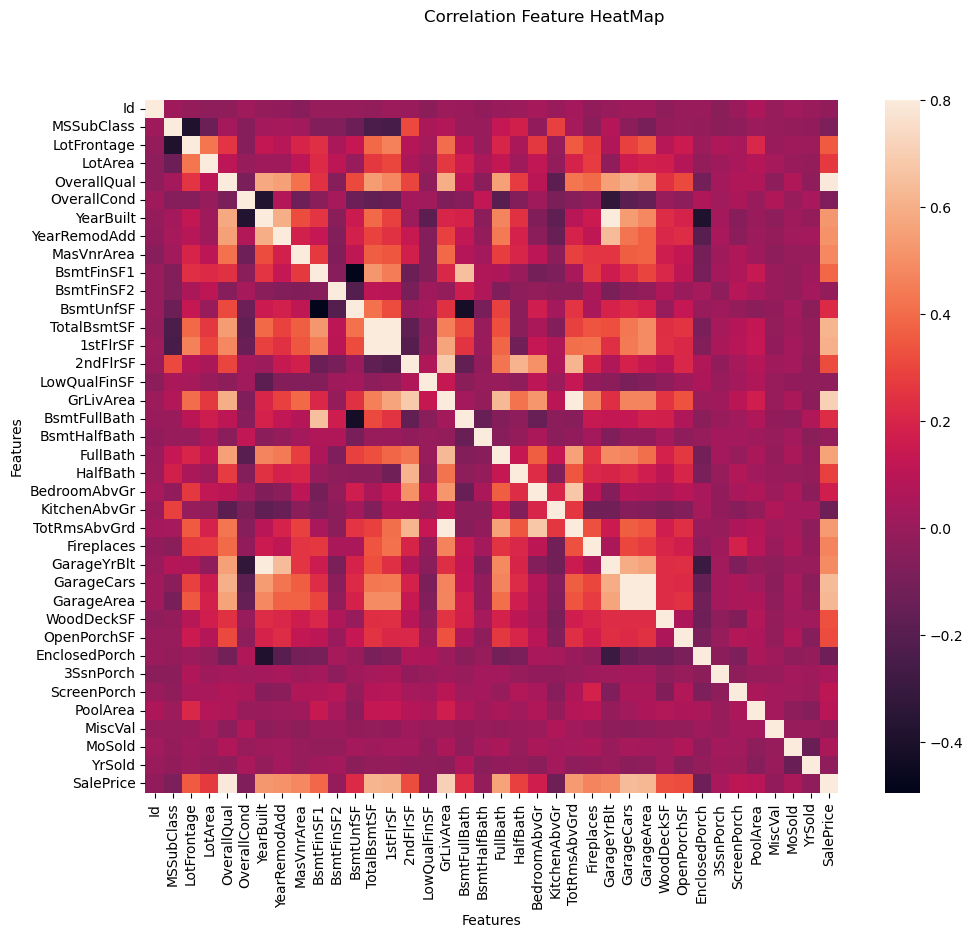

In [10]:

# Select only numeric columns for correlation matrix
numeric_df = df_train.select_dtypes(include=[float, int])
# Calculate the correlation matrix
corr_mat = numeric_df.corr()
# Create a heatmap of the correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True)

# Add title and labels
plt.suptitle("Correlation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

# Show plot
plt.show()

Text(99.74999999999999, 0.5, 'Features')

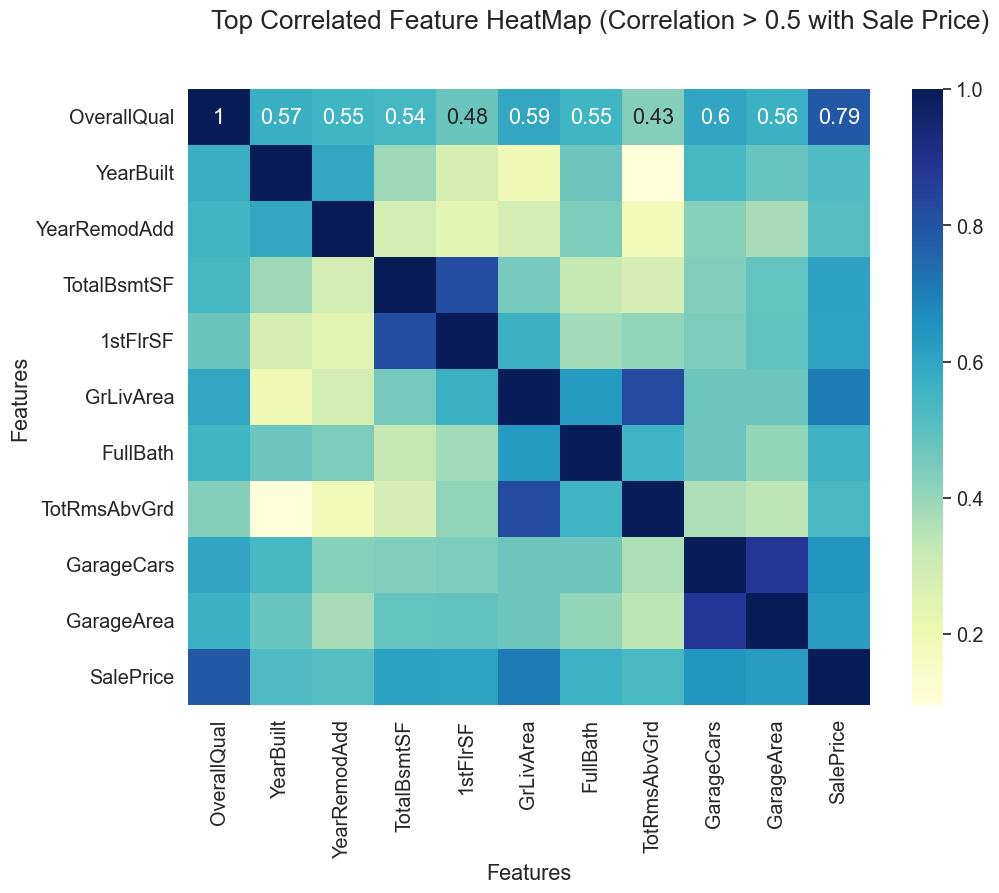

In [11]:
# most correlated features
corr_mat = numeric_df.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [12]:
#We need to print the correlation values
print("Correlation Values")

corr = numeric_df.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

The anaylsysi show that OverallQual and GrLivArea are more correlated to SalePrice

**Data Cleaning**

We will begining the data cleaning by dropping the ID Column since it will not be reguired for training and prediction

In [13]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

Dealing with Outliers

In [14]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

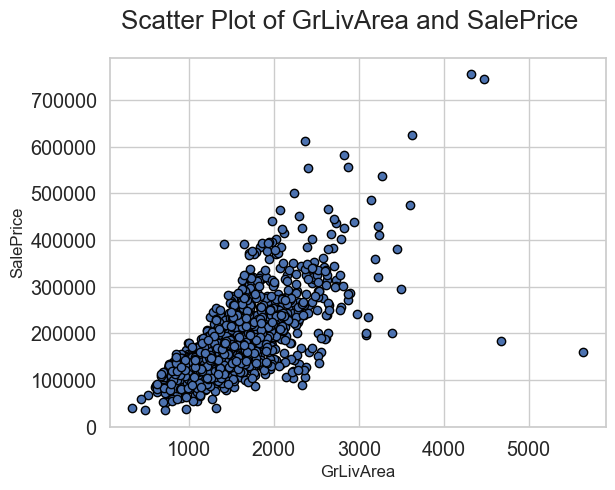

In [15]:
#Check the graphic again
scatter_plot('GrLivArea')

The plot shows a large number of outliers and this will negatively affect the results of our prediction. We will therefore, drop the outliers

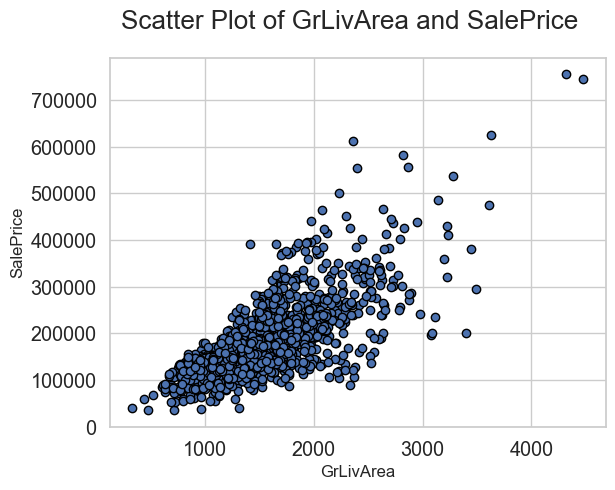

In [16]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

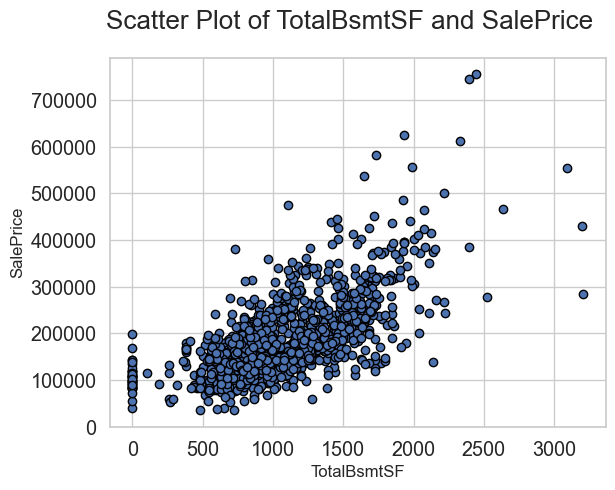

In [17]:
scatter_plot('TotalBsmtSF')

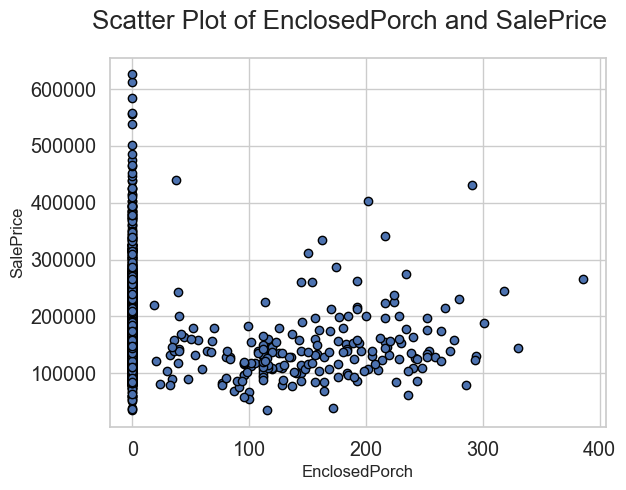

In [18]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)

#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

There not so many outliers. Therefore, we will leave them

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

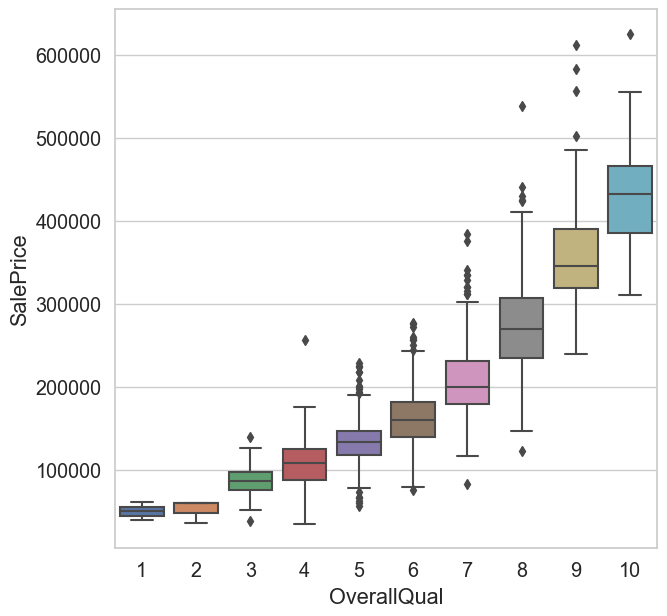

In [19]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

c:\Users\walla\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: 1.567473
Kurtosis: 3.888317


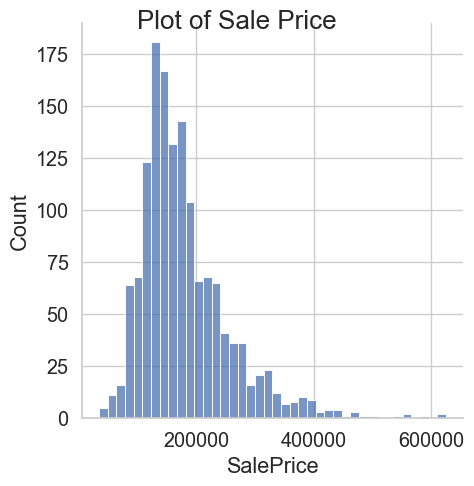

In [20]:
sns.displot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

c:\Users\walla\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

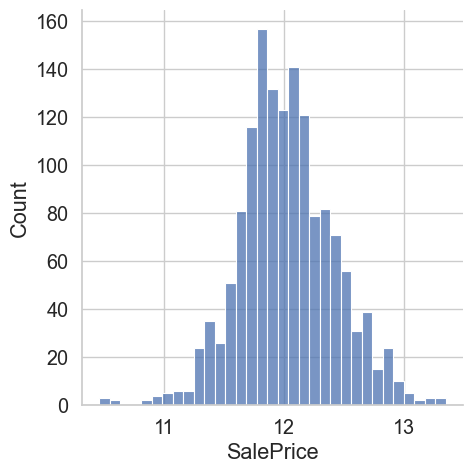

In [21]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.displot(df_train['SalePrice'])
plt.show()

In [22]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [23]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [24]:
df_train.shape

(1455, 80)

In [25]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [26]:
#training data    
missing_data(df_train,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
MasVnrType                        870         59.793814                 3
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageYrBlt                        81          5.567010                97
GarageCond                         81          5.567010                 5
GarageType                         81          5.567010                 6
GarageFinish                       81          5.567010                 3
GarageQual                         81          5.567010                 5
BsmtExposure                       38 

The columns, PoolQC, MiscFeature, and Alley will be dropped because of the high percentage of missing values.

In [27]:
#test data 
missing_data(df_test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageFinish                       78          5.346127                 3
GarageQual                         78          5.346127                 4
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45 

In [28]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

* The Utilities column shows that there is only one unique value (`AllPub`). Despite few missing values, the column will be dropped as it will not aid in prediction.
* The columns with many missing values will also be dropped. Such include PoolQC, MiscFeature, and Alley.

In [29]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

7812
7878


In [30]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [31]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [32]:
df_train = missing(df_train)
df_test = missing(df_test)

In [33]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [34]:
df_train.shape,df_test.shape

((1455, 75), (1459, 75))

In [35]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [36]:
# add the new columns
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [37]:
df_train.shape,df_test.shape

((1455, 80), (1459, 80))